<p style='font-size:1.75rem;line-height:1.5'>
    Classify if Pi's were less than or equal to 6 ft apart using Logistic Regression <br> Feature: Received Signal Strength Indication (RSSI)
    </p>

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from math import *
from sklearn.model_selection import train_test_split

In [2]:
data = pd.read_csv("../Zeng_Eloise_CollectedData/pi_pact_data.csv")
data.insert(0, 'ones', 1)
X = data[['ones', 'RSSI']]
y = data.iloc[:, -1]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42) 
print(X_train)
X_train = X_train.to_numpy()
X_test = X_test.to_numpy()
y_train = np.reshape(y_train.to_numpy(), (len(y_train),1))
y_test = np.reshape(y_test.to_numpy(), (len(y_test),1))
m = X_train.shape[0]

     ones       RSSI
60      1 -63.118644
67      1 -56.065574
98      1 -60.660714
110     1 -59.525424
97      1 -55.524590
..    ...        ...
71      1 -56.491525
106     1 -64.571429
14      1 -53.491525
92      1 -63.689655
102     1 -60.033898

[108 rows x 2 columns]


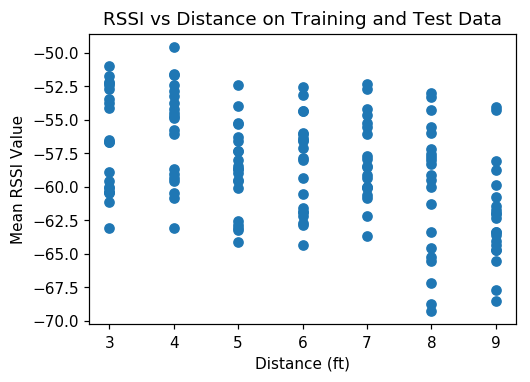

,f,h,t,RSSI
0,3,65.0,88.2,-52.250000
1,3,82.5,79.2,-51.033898
2,3,65.5,80.7,-60.380952
3,3,37.0,102.0,-56.666667
4,3,37.0,102.0,-56.666667
...,...,...,...,...
140,9,62.0,72.3,-58.103448
141,9,66.0,66.2,-62.017241
142,9,24.0,114.6,-54.278689
143,9,38.0,86.4,-54.034483


In [3]:
data2 = pd.read_csv("../Zeng_Eloise_CollectedData/pi_pact_data_ft.csv") # csv file contains ft measurements
X2 = data2['f'].to_numpy()
y2 = data2['RSSI'].to_numpy()
plt.figure(figsize=(5, 3.5), dpi=110)
plt.scatter(X2, y2)
plt.xlabel("Distance (ft)")
plt.ylabel("Mean RSSI Value")
plt.title("RSSI vs Distance on Training and Test Data")
plt.show()
data2

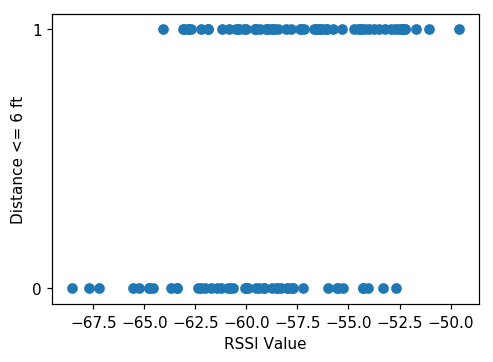

In [4]:
plt.figure(figsize=(5, 3.5), dpi=110)
plt.scatter(X_train[:, 1], y_train)
plt.xlabel("RSSI Value")
plt.ylabel("Distance <= 6 ft")
plt.yticks([0, 1])
plt.show()

## Sigmoid, gradient, and cost function <br> Use scipy.optimize to do logistic regression on training data.

In [5]:
import numpy as np
import scipy.optimize as op

def sigmoid(z):
    z = np.ones(z.shape) / (1 + np.exp(-z))
    return z

def Gradient(theta,x,y):
    m,n = x.shape
    theta = theta.reshape((n,1)) 
    y = y.reshape((m,1))
    sigmoid_x_theta = sigmoid(x.dot(theta)) 
    grad = ((x.T).dot(sigmoid_x_theta-y))/m 
    return grad.flatten() 

def CostFunc(theta,x,y):
    m,n = x.shape  
    theta = theta.reshape((n,1)) 
    y = y.reshape((m,1)) 
    term1 = np.log(sigmoid(x.dot(theta))) 
    term2 = np.log(1-sigmoid(x.dot(theta))) 
    term1 = term1.reshape((m,1))
    term2 = term2.reshape((m,1))
    term = y * term1 + (1 - y) * term2 
    J = -((np.sum(term))/m) 
    return J 

m, n = X_train.shape
initial_theta = np.zeros((n, 1))
Result = op.minimize(fun = CostFunc, 
                     x0 = initial_theta, 
                     args = (X_train, y_train),
                     method = 'TNC',
                     jac = Gradient) 

theta = Result.x
Result

     fun: 0.6147195051405391
     jac: array([-1.52594974e-07,  7.17982140e-06])
 message: 'Converged (|f_n-f_(n-1)| ~= 0)'
    nfev: 17
     nit: 8
  status: 1
 success: True
       x: array([12.25733388,  0.20400582])

In [6]:
# Predicts if Pis were TCTL using x's features and theta
def predict(x):
    predict = sigmoid(np.dot(x, theta))
    predict[predict >= 0.5] = 1
    predict[predict < 0.5] = 0
    return predict

In [7]:
# Concatenate predictions on X_test and y_test
pred_y_test = np.concatenate([np.reshape(predict(X_test), (len(y_test), 1)), y_test], axis=1)
# Calculate accuracy (# of correct predictions / # of cases)
acc_test = round((np.ravel(sum(pred_y_test[:, 0] == pred_y_test[:, 1])/len(y_test))[0]) * 100, 2)
# Concatenate predictions on X_train and y_train
pred_y_train = np.concatenate([np.reshape(predict(X_train), (len(y_train), 1)), y_train], axis=1)
# Calculate accuracy (# of correct predictions / # of cases)
acc_train = round((np.ravel(sum(pred_y_train[:, 0] == pred_y_train[:, 1])/len(y_train))[0] * 100), 2)
print("Train accuracy: ", acc_train, "%")
print("Test accuracy: ", acc_test, "%")
percent_pos_train = round((sum(sum(y_train)) / len(y_train)) * 100) # % of cases are positive in training data
percent_pos_test = round((sum(sum(y_test)) / len(y_test)) * 100) # % of cases are positive in testing data
print(percent_pos_train, "% of cases are positive in training data")
print(percent_pos_test, "% of cases are positive in testing data")

Train accuracy:  62.96 %
Test accuracy:  56.76 %
57 % of cases are positive in training data
57 % of cases are positive in testing data


In [8]:
pos_indice = np.nonzero(pred_y_train[:, 0]) # Get indices where computer predicted y_train == 1
neg_indice = np.nonzero(pred_y_train[:, 0] == 0) # Get indices where computer predicted y_train == 1

# Store number of predictions that...
true_neg = sum(sum(pred_y_train[pos_indice, 0] == pred_y_train[pos_indice, 1])) 
# == y_train when prediction == 0
false_neg = sum(sum(pred_y_train[pos_indice, 0] != pred_y_train[pos_indice, 1])) 
# != y_train when prediction == 0
true_pos = sum(sum(pred_y_train[neg_indice, 0] == pred_y_train[neg_indice, 1])) 
# == y_train when prediction == 1
false_pos = sum(sum(pred_y_train[neg_indice, 0] != pred_y_train[neg_indice, 1])) 
# != y_train when prediction == 1
precision = round(true_pos/(false_pos + true_pos), 3)
recall = round(true_pos/(false_neg + true_pos), 3)
f1 = round(2 * precision * recall / (precision + recall), 3) # F1 Score
data = {'Actual Positive': [true_pos, false_neg, recall], 
        'Actual Negative': [false_pos, true_neg, ''], 
        'Precision': [precision, '', 'F1 Score: ' + str(f1)]}
print("Train Data")
contingency_table = pd.DataFrame(data, index=['Predict Positive', 'Predict Negative', 'Recall'])
contingency_table

Train Data


,Actual Positive,Actual Negative,Precision
Predict Positive,21.000,15,0.583
Predict Negative,25.000,47,
Recall,0.457,,F1 Score: 0.512


In [9]:
pos_indice = np.nonzero(pred_y_test[:, 0])
neg_indice = np.nonzero(pred_y_test[:, 0] == 0)

# Store number of predictions that...
true_neg = sum(sum(pred_y_test[pos_indice, 0] == pred_y_test[pos_indice, 1])) 
# == y_train when predictions == 0
false_neg = sum(sum(pred_y_test[pos_indice, 0] != pred_y_test[pos_indice, 1])) 
# != y_train when predictions == 0
true_pos = sum(sum(pred_y_test[neg_indice, 0] == pred_y_test[neg_indice, 1])) 
# == y_train when prediction == 1
false_pos = sum(sum(pred_y_test[neg_indice, 0] != pred_y_test[neg_indice, 1])) 
# != y_train when prediction == 1
precision = round(true_pos/(false_pos + true_pos), 3)
recall = round(true_pos/(false_neg + true_pos), 3)
f1 = round(2 * precision * recall / (precision + recall), 3)
data = {'Actual Positive': [true_pos, false_neg, recall], 
        'Actual Negative': [false_pos, true_neg, ''], 
        'Precision': [precision, '', 'F1 Score: ' + str(f1)]}
print("Test Data")
contingency_table = pd.DataFrame(data, index=['Predict Positive', 'Predict Negative', 'Recall'])
contingency_table

Test Data


,Actual Positive,Actual Negative,Precision
Predict Positive,8.0,8,0.5
Predict Negative,8.0,13,
Recall,0.5,,F1 Score: 0.5


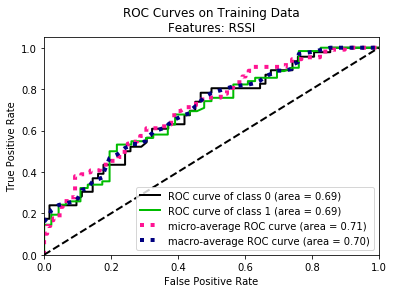

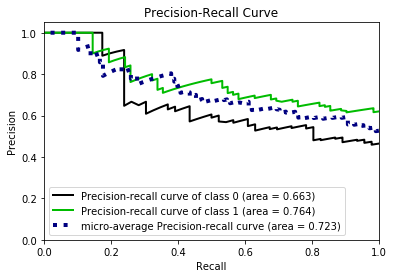

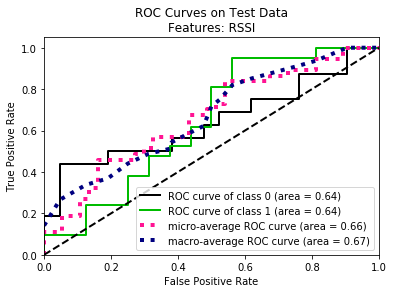

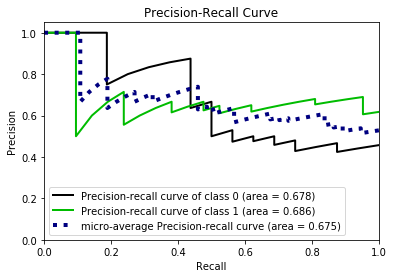

In [10]:
# Predicts if Pis were TCTL using x's features and theta
def prob(x):
    prob_1 = sigmoid(np.dot(x, theta))
    prob_0 = np.ones(len(x)) - prob_1
    return prob_1, prob_0

import scikitplot as skplt
y_probas_1 = np.reshape(prob(X_train)[0], (len(X_train), 1)) # Probability of training example == 1
y_probas_0 = np.reshape(prob(X_train)[1], (len(X_train), 1)) # Probability of training example == 0
y_probas = np.concatenate((y_probas_0, y_probas_1), axis=1)
skplt.metrics.plot_roc(np.ravel(y_train), y_probas, title='ROC Curves on Training Data\nFeatures: RSSI') # Plot ROC Curve
skplt.metrics.plot_precision_recall(np.ravel(y_train), y_probas)
plt.show()

y_probas_1 = np.reshape(prob(X_test)[0], (len(X_test), 1)) # Probability of test example == 1
y_probas_0 = np.reshape(prob(X_test)[1], (len(X_test), 1)) # Probability of test example == 0
y_probas = np.concatenate((y_probas_0, y_probas_1), axis=1)
skplt.metrics.plot_roc(np.ravel(y_test), y_probas, title='ROC Curves on Test Data\nFeatures: RSSI') # Plot ROC Curve
skplt.metrics.plot_precision_recall(np.ravel(y_test), y_probas)
plt.show()

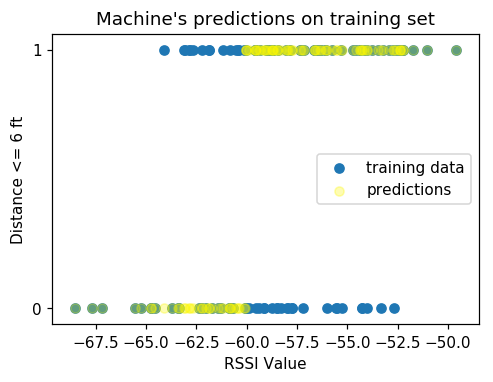

In [11]:
plt.figure(figsize=(5, 3.5), dpi=110)
plt.scatter(X_train[:, 1], y_train, label='training data')
plt.scatter(X_train[:, 1], np.ravel(predict(X_train)), color='#fcf803', alpha=0.3, label='predictions')
plt.xlabel("RSSI Value")
plt.ylabel("Distance <= 6 ft")
plt.yticks([0, 1])
plt.title("Machine's predictions on training set")
plt.legend()
plt.show()

In [12]:
range_RSSI = int(np.ptp(X_train[:, 1]))
min_val = int(np.amin(X_train[:, 1]))
max_val = int(np.amax(X_train[:, 1]))
generate_ones = np.reshape(np.ones(range_RSSI + 3), (range_RSSI + 3, 1))
generate_range = np.reshape(np.arange(min_val - 1, (max_val + 1)), (range_RSSI + 3, 1))
XX = np.concatenate([generate_ones, generate_range], axis=1)

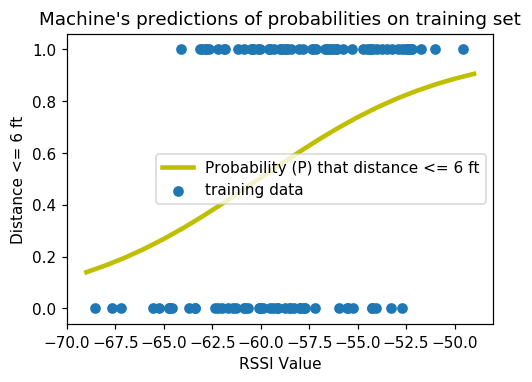

In [13]:
plt.figure(figsize=(5, 3.5), dpi=110)
plt.scatter(X_train[:, 1], y_train, label='training data')
plt.plot(XX[:, 1], sigmoid(np.dot(XX, theta)), color='y', 
         label='Probability (P) that distance <= 6 ft', linewidth=3)
plt.xlabel("RSSI Value")
plt.ylabel("Distance <= 6 ft")
plt.title("Machine's predictions of probabilities on training set")
plt.legend()
plt.show()

In [14]:
range_RSSI = int(np.ptp(X_test[:, 1]))
min_val = int(np.amin(X_test[:, 1]))
max_val = int(np.amax(X_test[:, 1]))
generate_ones = np.reshape(np.ones(range_RSSI + 3), (range_RSSI + 3, 1))
generate_range = np.reshape(np.arange(min_val - 1, (max_val + 1)), (range_RSSI + 3, 1))
XX = np.concatenate([generate_ones, generate_range], axis=1)

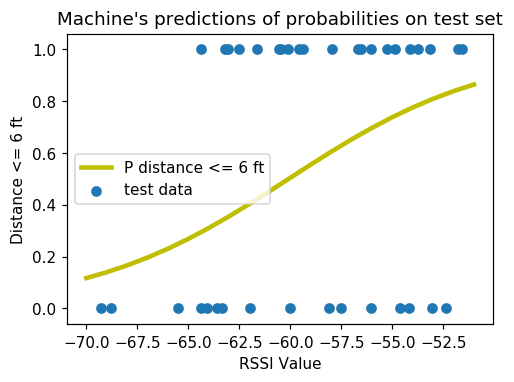

In [15]:
plt.figure(figsize=(5, 3.5), dpi=110)
plt.scatter(X_test[:, 1], y_test, label='test data')
plt.plot(XX[:, 1], sigmoid(np.dot(XX, theta)), color='y', linewidth=3, label='P distance <= 6 ft')
plt.xlabel("RSSI Value")
plt.ylabel("Distance <= 6 ft")
plt.title("Machine's predictions of probabilities on test set")
plt.legend()
plt.show()

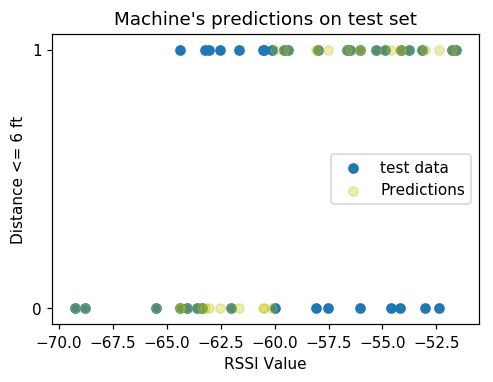

In [16]:
plt.figure(figsize=(5, 3.5), dpi=110)
plt.scatter(X_test[:, 1], y_test, label='test data')
plt.scatter(X_test[:, 1], predict(X_test), color='y', alpha=0.3, label='Predictions')
plt.xlabel("RSSI Value")
plt.ylabel("Distance <= 6 ft")
plt.title("Machine's predictions on test set")
plt.yticks([0, 1])
plt.legend()
plt.show()